In [25]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random as rd

In [9]:
def vitruvium_dice_roller():
    variants = [0, 1, 2]
    probs = [3/6, 2/6, 1/6]
    return np.random.choice(variants, p=probs)

In [21]:
def probability_vitruvium_dices(max_dice: int, sample_size: int):
    max_success = 2 * max_dice
    results = np.zeros((max_dice, max_success + 1))

    for dice_count in range(1, max_dice + 1):
        success_counts = np.zeros(max_success + 1)
        
        for _ in range(sample_size):
            total_success = sum(vitruvium_dice_roller() for _ in range(dice_count))
            if total_success <= max_success:
                success_counts[total_success] += 1
        probabilities = [round(count / sample_size, 4) for count in success_counts]
        results[dice_count - 1] = probabilities
    
    return results.tolist()

In [27]:
def visualize_probability_table(probabilities: list[list[float]]):
    max_dice = len(probabilities)
    max_success = len(probabilities[0]) - 1
    df = pd.DataFrame(probabilities,
                     index=range(1, max_dice + 1),
                     columns=range(0, max_success + 1))
    plt.figure(figsize=(16, 12))
    color_palette = 'YlGnBu'
    ax = sb.heatmap(df, 
                annot=True, 
                fmt='.2f',
                cmap=color_palette, 
                cbar_kws={'label': 'Вероятность'},
                linewidths=0.5,
                annot_kws={
                    'size': 14,
                    'weight': 'bold'
                })
    plt.title('Дайсы Витрувия', 
              fontsize=18, pad=25, weight='bold')
    plt.xlabel('Количество успехов', fontsize=16, weight='bold')
    plt.ylabel('Количество кубов', fontsize=16, weight='bold')
    ax.tick_params(axis='both', which='major', labelsize=14)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Вероятность', size=16, weight='bold')
    
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

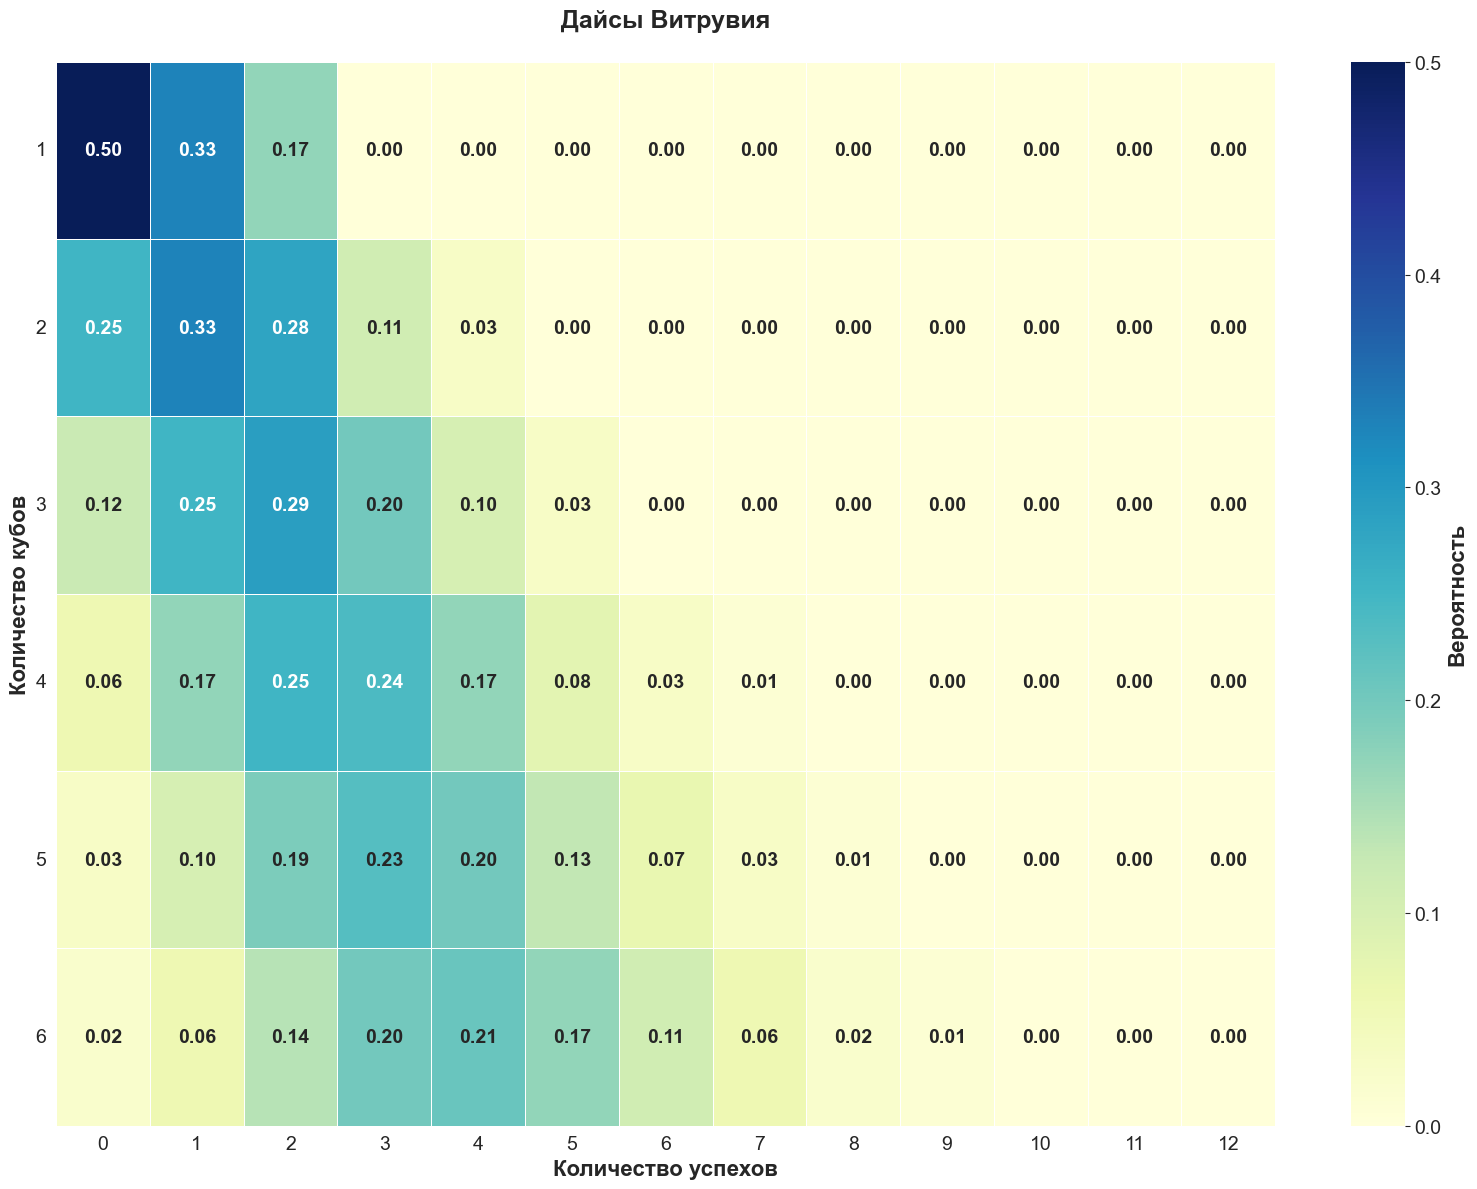

In [30]:
MAX_DICE = 6
SAMPLE_SIZE = 1000000
prob_matrix = probability_vitruvium_dices(MAX_DICE, SAMPLE_SIZE)
visualize_probability_table(prob_matrix)